In [1]:
# Tests extract step itself, given known matrices

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.sparse.linalg import lsmr
import time

from scipy.sparse import diags

In [4]:
# retrieve instrument response matrix

file_name = "../sample.pkl"
open_file = open(file_name, "rb")

# response matrix, test commands, 2D detector test response
A_mat, test_cmds, test_response = pickle.load(open_file)
open_file.close()

In [5]:
print(np.shape(A_mat))
print(np.shape(test_cmds))
print(np.shape(test_response))

(10, 20000)
(10, 10)
(10, 100, 200)


In [8]:
# make fake empirical detector readout and noise array

# 2D array of counts on detector
detector_measured = np.random.normal(loc=0,size=(np.shape(test_response)[1],np.shape(test_response)[2]))

detector_variance = 0.1*np.random.normal(loc=0,size=(np.shape(test_response)[1],np.shape(test_response)[2]))

In [9]:
print(np.shape(detector_measured))
print(np.shape(detector_variance))

(100, 200)
(100, 200)


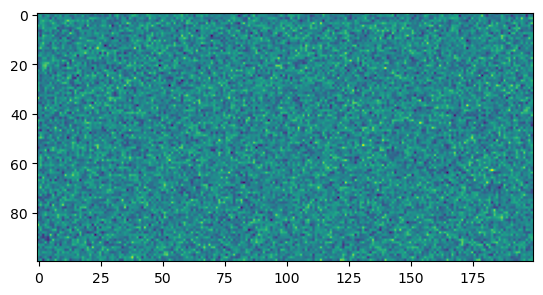

In [25]:
plt.imshow(detector_variance)
plt.show()

In [10]:
# make weight matrix

w = 1./detector_variance.flatten()
W = diags(w, 0)

In [11]:
np.shape(W)

(20000, 20000)

In [14]:
B = np.array([[1,2],[3,4],[5,6]])
C = np.array([[4,4,4]])
print(np.shape(B))
print(np.shape(C))

(3, 2)
(1, 3)


In [17]:
C@B

array([[36, 48]])

In [23]:
#standard

time_0 = time.time()

A = A_mat

# compute matrices/vectors
ATW = A.T.dot(W) # A^T . W

time_1 = time.time()
print("Time:",time_1-time_0)

Time: 14.570397853851318


In [13]:
#standard

time_0 = time.time()

A = A_mat

# compute matrices/vectors
ATW = A.T@W # A^T . W

time_1 = time.time()
print("Time:",time_1-time_0)

Time: 0.009087085723876953


In [42]:
np.shape(ATW)

(20000, 10)

In [18]:
#print(np.shape(A.T))
print(np.shape(A))
print(np.shape(A.T))
print(np.shape(W))
#print(np.shape(C))

(10, 20000)
(20000, 10)
(20000, 20000)


In [65]:
B = np.array([[1],[2]])
C = np.array([[2,3],[4,5],[4,4]])
print(np.shape(B))
print(np.shape(C))
#np.matmul(C,B)
C@B

(2, 1)
(3, 2)


array([[ 8],
       [14],
       [12]])

In [67]:
#standard

time_0 = time.time()

A = A_mat

# compute matrices/vectors
#ATW = np.matmul(A.T,W) # A^T . W
#ATW = A.T @ W # A^T . W
ATW = W @ A.T # A^T . W

time_1 = time.time()
print("Time:",time_1-time_0)

Time: 0.6149640083312988


NameError: name 'python' is not defined

In [ ]:
time_0 = time.time()

#self.report(ATW, 'ATW')
ATWA = ATW.dot(A) # A^T . W . A

time_1 = time.time()
print("Time:",time_1-time_0)

In [ ]:
time_0 = time.time()

#self.report(ATWA, 'ATWA')
ATWx = ATW.dot(detector_measured.flat)

time_1 = time.time()
print("Time:",time_1-time_0)

In [ ]:
time_0 = time.time()

thresh=3e-4

# compute damping coefficient
ATWAdiag = ATWA.diagonal()
damp = thresh * ATWAdiag.max()

time_1 = time.time()
print("Time:",time_1-time_0)

In [2]:
'''
def extract(self, im, variance=None, thresh=3e-4):
        "invert linear response to recover cube"
        _log.debug('extract called')
        # compute weight array
        from scipy.sparse import diags
        if variance is None:
            w = n.ones(self.sim.ndetpix, dtype=n.float) # uniform weights
        else:
            w = 1./variance.flatten()
        if self.badpix is not None:
            wb = n.nonzero(self.badpix.flat)[0]
            w[wb] = 0.
        if n.any(n.isnan(im)):
            wb = n.nonzero(n.isnan(im.flat))[0]
            im[n.isnan(im)] = 0. # TEMP
            w[wb] = 0.
        W = diags(w, 0)

        # compute matrices/vectors
        ATW = self.A.T.dot(W) # A^T . W
        self.report(ATW, 'ATW')
        ATWA = ATW.dot(self.A) # A^T . W . A
        self.report(ATWA, 'ATWA')
        ATWx = ATW.dot(im.flat)

        # compute damping coefficient
        ATWAdiag = ATWA.diagonal()
        damp = thresh * ATWAdiag.max()

        # get least-squares solution
        from scipy.sparse.linalg import lsmr
        _log.info('running least-squares solver ...')
        # solve (ATWA)S = ATWx for S, where S is science signal and x is image
        spec_lw, istop, itn, normr, normar, norma, conda, normx = \
          lsmr(ATWA, ATWx,
               damp=damp,
               )
        _log.info('done.')

              
        # reformat structure into datacube
        spectra = n.empty((self.sim.nll, self.nlam), dtype=n.float)
        spectra[:] = n.nan
        spectra[self.wlw] = spec_lw
        return spectra
'''